/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training loss: 0.00091
Validation loss: 0.00212


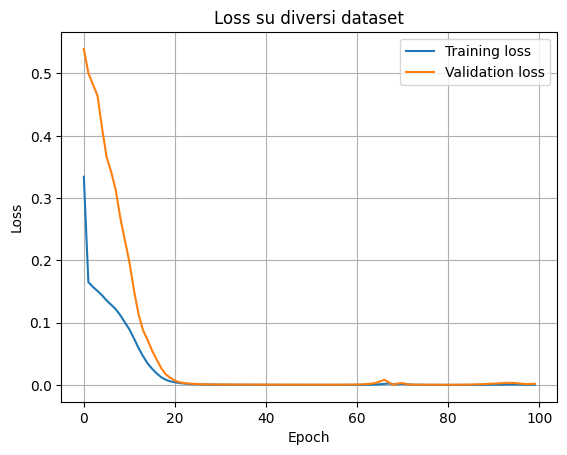

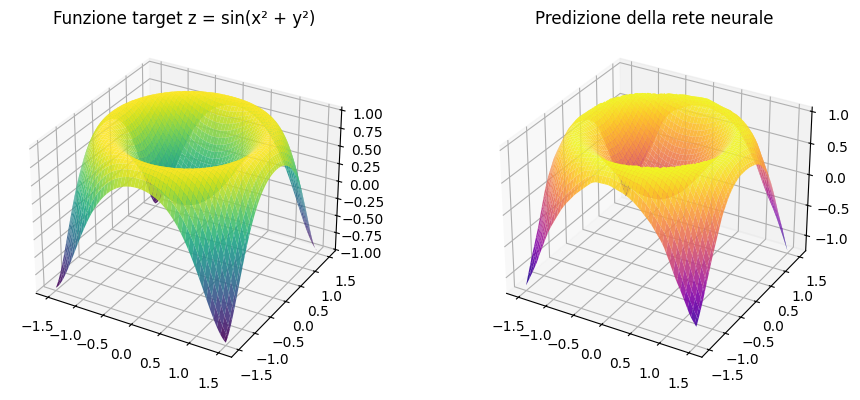

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from mpl_toolkits.mplot3d import Axes3D

epoche = 100

# imposto i seed per replicabilità dei dati
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#genero i dati di validazione e di allenamento
x_train = np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, 100)
x_valid.sort()
y_train = np.random.uniform(-1.5, 1.5, 1000)
y_valid = np.random.uniform(-1.5, 1.5, 100)
y_valid.sort()
z_target = np.sin(x_valid**2 + y_valid**2) # funzione target ideale

# Stack input data into shape (N, 2)
X_train = np.stack((x_train, y_train), axis=1)
X_valid = np.stack((x_valid, y_valid), axis=1)

sigma = 0.0 # rumore nei dati
#ordinate dei dati di validazione e di addestramento
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma)
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

#inizializzo la rete neurale
model = tf.keras.Sequential()
model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear')) #uso linear nell'output layer perchè la funzione può assumere valori di ogni tipo


#ciclo di addestramento
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, z_train,
                    batch_size=32, epochs=epoche,
                    validation_data=(X_valid, z_valid),
                    verbose=0)

#calcolo e stampo la loss sui dati di addestramento e validazione
loss_train = model.evaluate(X_train, z_train, verbose=0)
loss_valid = model.evaluate(X_valid, z_valid, verbose=0)
print(f"Training loss: {loss_train:.5f}")
print(f"Validation loss: {loss_valid:.5f}")

#plotto la loss sui dati di validazione e addestramento
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss su diversi dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.close()

# Costruisco griglia 2D di punti per il plotting
grid_x, grid_y = np.meshgrid(np.linspace(-1.5, 1.5, 100),
                             np.linspace(-1.5, 1.5, 100))

# creo gli input per la rete neurale
grid_inputs = np.stack([grid_x.ravel(), grid_y.ravel()], axis=1)

# Predizione del modello su tutti i punti della griglia
z_pred = model.predict(grid_inputs, verbose=0).reshape(grid_x.shape)

# Calcolo la funzione target vera per confronto
z_true = np.sin(grid_x**2 + grid_y**2)

# --- PLOT 3D delle predizioni della rete neurale ---
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Funzione target
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(grid_x, grid_y, z_true, cmap='viridis', alpha=0.9)
ax1.set_title("Funzione target z = sin(x² + y²)")

# Subplot 2: Predizione del modello
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(grid_x, grid_y, z_pred, cmap='plasma', alpha=0.9)
ax2.set_title("Predizione della rete neurale")

plt.tight_layout()
plt.show()


# Esercizio 11.3
Questo esercizio richiede una rete neurale più complessa perchè la funzione su cui eseguire il fit non è semplicemente ad un parametro o polinomiale. E' necessaria l'aggiunta di diversi hidden layer senza però rendere la rete neurale troppo complessa. Anche aumentare il numero di neuroni negli hidden layer e il numero di epoche migliora la predizione. Si noti che la rete neurale necessita di due neuroni di input, uno per il valore $x$ ed uno per il valore $y$.

Data la complessità sia della rete neurale (più strati e neuroni) sia della funzione da approssimare, ho scelto di usare l’ottimizzatore $adam$. A differenza di $sdg$, che è più semplice, $adam$ adatta dinamicamente alcuni dei suoi parametri come il learning rate, aiutando la rete a convergere più velocemente e in modo più stabile. $sdg$ senza un accurato controllo dei parametri, rischia facilmente di bloccarsi in minimi locali o di avere una convergenza lenta, specialmente in reti più complesse. Perciò, $adam$ è spesso preferito in questi casi perché migliora la capacità di esplorare lo spazio delle soluzioni e raggiungere minimi globali.

Si osserva un'ottima predizione della funzione target grazie ad un considerevole numero di epoche e la presenza di più di un hidden layer. Tuttavia ciò che ha migliorato notevolmente le capacità predittive della rete è l'ottimizzatore $adam$. Utilizzando $sdg$ infatti si ottengono risultati soddisfacenti, ma di peggiore qualità. Questo dimostra che una rete neurale efficiente richiede non solo una buona architettura (numero di layer e di neuroni) ed un adeguato numero di epoche, ma anche la scelta di un ottimizzatore adeguato al tipo di problema da risolvere.